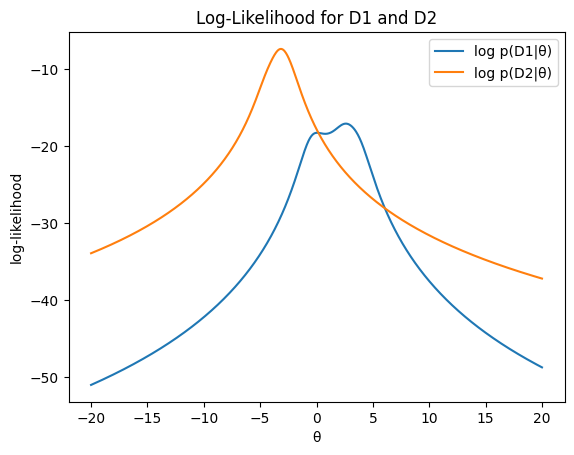

Maximum likelihood for θ1: 2.5825825825825817
Maximum likelihood for θ2: -3.143143143143142


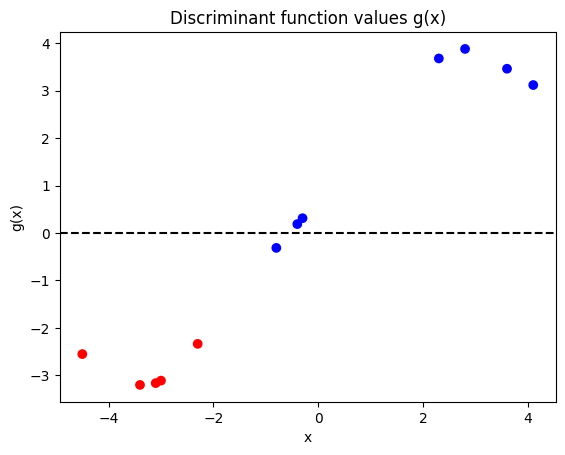

g(x) values: [ 3.88267986  0.18734551 -0.31428295  3.68155572  0.31191573  3.46471501
  3.12076776 -2.5543665  -3.20489872 -3.16697763 -3.1141309  -2.33895351]
Classification: ['ω1', 'ω1', 'ω2', 'ω1', 'ω1', 'ω1', 'ω1', 'ω2', 'ω2', 'ω2', 'ω2', 'ω2']


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Classifier:
    def __init__(self):     # Constructor of the Classifier class
        self.theta1 = None
        self.theta2 = None

    # Computes the maximum likelihood estimates for θ
    def fit(self, D1, D2, theta_candidates):

        # Computes the log-likelihood function for a dataset D
        # and a given parameter value θ
        def log_likelihood(D, theta):
            return -len(D) * np.log(np.pi) - np.sum(np.log(1 + (D - theta)**2))

        # Compute log-likelihoods for the two classes
        log_likelihood_1 = [log_likelihood(D1, theta) for theta in theta_candidates]
        log_likelihood_2 = [log_likelihood(D2, theta) for theta in theta_candidates]

        # Find the θ that maximizes the likelihood
        # Explanation: using the index, we get from theta_candidates
        # the θ value that maximizes the log-likelihood
        self.theta1 = theta_candidates[np.argmax(log_likelihood_1)]
        self.theta2 = theta_candidates[np.argmax(log_likelihood_2)]

        return log_likelihood_1, log_likelihood_2


    # Returns the values of the discriminant function g(x)
    def predict(self, x, prior_w1, prior_w2):
        p1 = -np.log(np.pi) - np.log(1 + (x - self.theta1)**2)
        p2 = -np.log(np.pi) - np.log(1 + (x - self.theta2)**2)
        g_x = p1 - p2 + np.log(prior_w1) - np.log(prior_w2)

        return g_x


# Data
# For us, D = [x1, x2, ..., xN]
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Candidate values for θ
theta_candidates = np.linspace(-20, 20, 1000)

# Create the classifier
classifier = Classifier()

# Parameter estimation
log_likelihood_1, log_likelihood_2 = classifier.fit(D1, D2, theta_candidates)

# Plot the log-likelihoods
plt.plot(theta_candidates, log_likelihood_1, label="log p(D1|θ)")
plt.plot(theta_candidates, log_likelihood_2, label="log p(D2|θ)")
plt.xlabel("θ")
plt.ylabel("log-likelihood")
plt.legend()
plt.title("Log-Likelihood for D1 and D2")
plt.show()

# Print the maximum likelihood estimates
print(f"Maximum likelihood for θ1: {classifier.theta1}")
print(f"Maximum likelihood for θ2: {classifier.theta2}")

# Classify the data
prior_w1 = len(D1) / (len(D1) + len(D2))
prior_w2 = len(D2) / (len(D1) + len(D2))

# Compute g(x) for the data
x_values = np.concatenate((D1, D2))
g_x_values = classifier.predict(x_values, prior_w1, prior_w2)

# Plot the discriminant function g(x)
plt.scatter(x_values, g_x_values, c=["blue"] * len(D1) + ["red"] * len(D2), label="g(x)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Discriminant function values g(x)")
plt.show()

# Print classification
print("g(x) values:", g_x_values)
print("Classification:", ["ω1" if gx > 0 else "ω2" for gx in g_x_values])


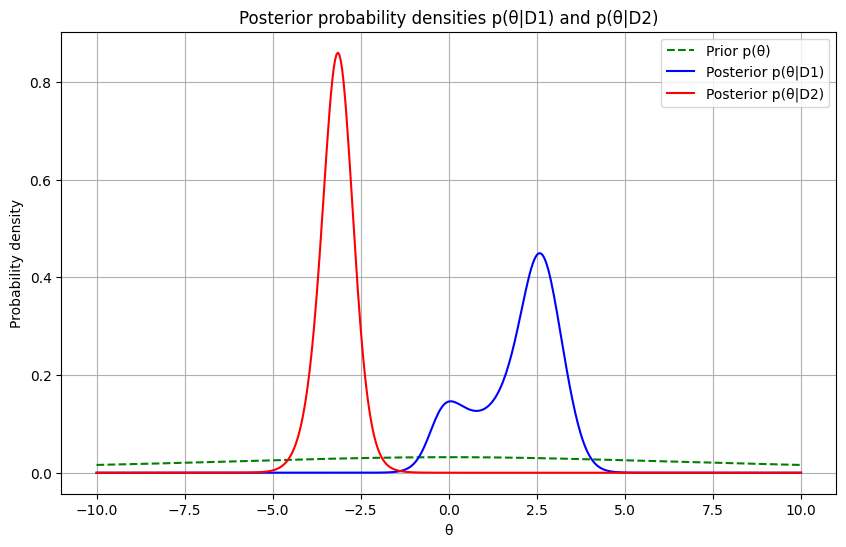

C:\Users\Αγγελική\AppData\Local\Temp\ipykernel_22152\1700295892.py:49: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz([1 / (1 + (x - t)**2) * p for t, p in zip(theta_range_values, posterior)], theta_range)


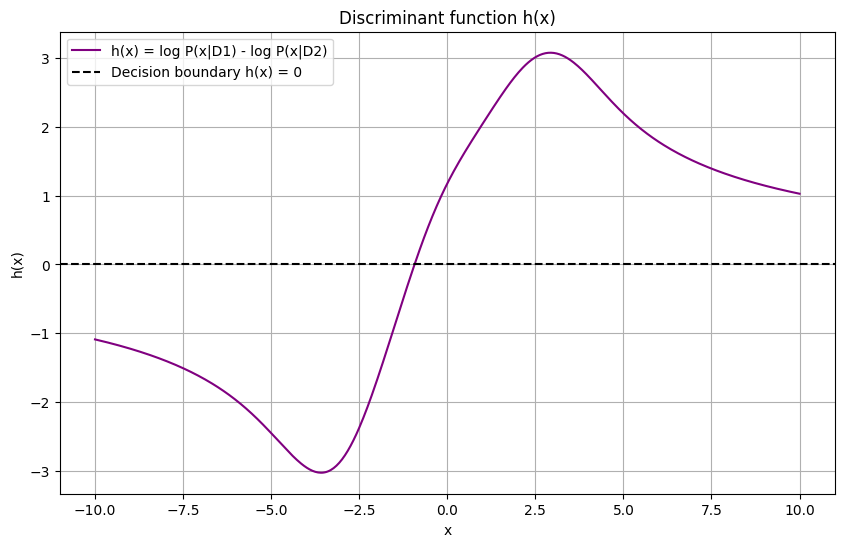

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

# Data from Part A
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Range of θ values
theta_range = np.linspace(-10, 10, 500)

# Prior p(θ)
def prior(theta):
    return (1 / (10 * np.pi)) * (1 / (1 + (theta / 10)**2))

# Likelihood p(D|θ)
def likelihood(theta, data):
    return np.prod(1 / (1 + (data - theta)**2))

# Posterior p(θ|D) (unnormalized)
def posterior(theta, data):
    return likelihood(theta, data) * prior(theta)

# Compute posterior for D1 and D2
posterior_D1 = [posterior(theta, D1) for theta in theta_range]
posterior_D2 = [posterior(theta, D2) for theta in theta_range]

# Normalize posterior using trapezoidal rule
posterior_D1 = posterior_D1 / trapezoid(posterior_D1, theta_range)
posterior_D2 = posterior_D2 / trapezoid(posterior_D2, theta_range)

# Plot the prior and posterior probability densities
plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior(theta_range), label="Prior p(θ)", color="green", linestyle="--")
plt.plot(theta_range, posterior_D1, label="Posterior p(θ|D1)", color="blue")
plt.plot(theta_range, posterior_D2, label="Posterior p(θ|D2)", color="red")
plt.title("Posterior probability densities p(θ|D1) and p(θ|D2)")
plt.xlabel("θ")
plt.ylabel("Probability density")
plt.legend()
plt.grid()
plt.show()

# Compute the density P(x|D)
def density(x, theta_range, posterior, theta_range_values):
    """
    Computes the probability density P(x|D) for a given x.
    """
    return np.trapz([1 / (1 + (x - t)**2) * p for t, p in zip(theta_range_values, posterior)], theta_range)

# Discriminant function h(x)
def predict(x, theta_range, posterior_D1, posterior_D2, P_w1=0.5, P_w2=0.5):
    """
    Computes the discriminant function h(x) and returns the predicted class.

    x: float, the input value
    theta_range: the range of θ values
    posterior_D1: posterior probability density p(θ|D1)
    posterior_D2: posterior probability density p(θ|D2)
    P_w1: prior probability for class ω1
    P_w2: prior probability for class ω2

    Returns:
    - the discriminant function h(x)
    - the predicted class ("ω1" or "ω2")
    """
    # Compute the densities P(x|D1) and P(x|D2)
    px_D1 = density(x, theta_range, posterior_D1, theta_range)
    px_D2 = density(x, theta_range, posterior_D2, theta_range)

    # Compute the discriminant function h(x)
    log_px_D1 = np.log(px_D1)
    log_px_D2 = np.log(px_D2)
    h_x = log_px_D1 - log_px_D2 + np.log(P_w1) - np.log(P_w2)

    # Determine the class
    if h_x > 0:
        category = "ω1"  # No stress
    else:
        category = "ω2"  # With stress

    return h_x, category

# Example usage of the predict function for a range of x values
x_range = np.linspace(-10, 10, 500)
h_values = []
categories = []

for x in x_range:
    h_x, category = predict(x, theta_range, posterior_D1, posterior_D2)
    h_values.append(h_x)
    categories.append(category)

# Plot the discriminant function h(x)
plt.figure(figsize=(10, 6))
plt.plot(x_range, h_values, label="h(x) = log P(x|D1) - log P(x|D2)", color="purple")
plt.axhline(0, color="black", linestyle="--", label="Decision boundary h(x) = 0")
plt.title("Discriminant function h(x)")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.legend()
plt.grid()
plt.show()


Best tree depth: 3
Best classification accuracy: 78.67%


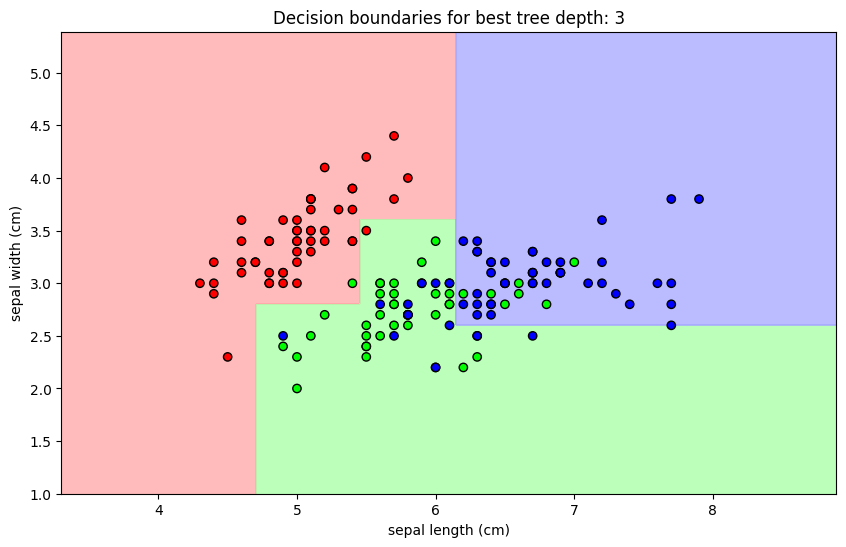

Best tree depth for Random Forest: 2
Best classification accuracy: 82.67%


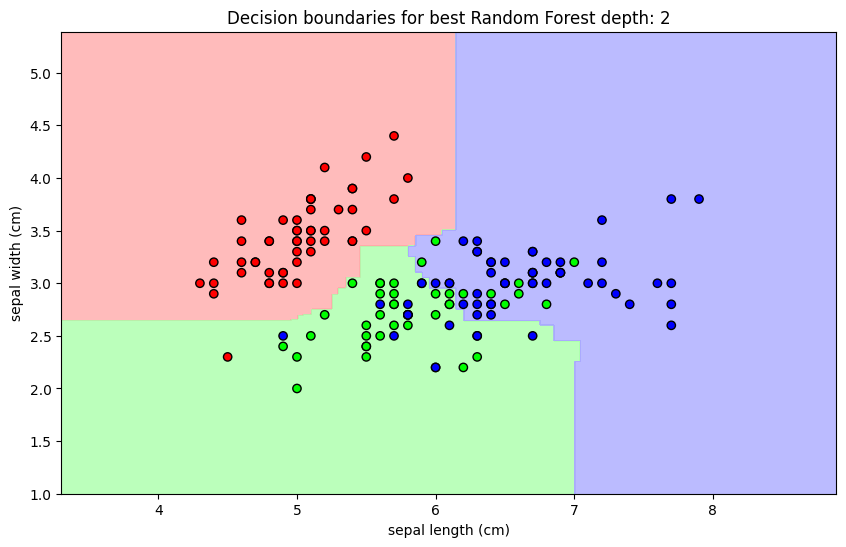

Classification accuracy for γ=0.1: 80.00%
Classification accuracy for γ=0.2: 80.00%
Classification accuracy for γ=0.3: 81.33%
Classification accuracy for γ=0.4: 82.67%
Classification accuracy for γ=0.5: 82.67%
Classification accuracy for γ=0.6: 82.67%
Classification accuracy for γ=0.7: 82.67%
Classification accuracy for γ=0.9: 82.67%
Classification accuracy for γ=1.0: 82.67%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Importing data from Iris
data = load_iris()
X = data.data[:, :2]  # Using only the first two columns
y = data.target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Testing different tree depths
best_depth = None
best_accuracy = 0
depths = range(1, 11)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions in test set
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Percentage of best accuracy
best_depth = depths[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best tree depth: {best_depth}")
print(f"Best classification accuracy: {best_accuracy * 100:.2f}%")

# Training the model with the best tree depth
clf_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_best.fit(X_train, y_train)

# Displaying decision borders
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predictions for every point
Z = clf_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title(f"Decision boundaries for best tree depth: {best_depth}")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()


from sklearn.ensemble import RandomForestClassifier

# Evaluating Random Forest for various tree depths
best_rf_depth = None
best_rf_accuracy = 0
accuracies_rf = []

for depth in depths:
    # Creating Random Forest classifier with 100 trees and Bootstrap
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=depth, bootstrap=True, random_state=42)
    clf_rf.fit(X_train, y_train)

    # Prediction on test set
    y_pred_rf = clf_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracies_rf.append(accuracy_rf)

# Best classification accuracy and best tree depth for Random Forest
best_rf_depth = depths[np.argmax(accuracies_rf)]
best_rf_accuracy = max(accuracies_rf)
print(f"Best tree depth for Random Forest: {best_rf_depth}")
print(f"Best classification accuracy: {best_rf_accuracy * 100:.2f}%")

# Displaying decision borders for best Random Forest
clf_best_rf = RandomForestClassifier(n_estimators=100, max_depth=best_rf_depth, bootstrap=True, max_samples=0.5, random_state=42)
clf_best_rf.fit(X_train, y_train)

# Prediction for each point
Z_rf = clf_best_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_rf, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.title(f"Decision boundaries for best Random Forest depth: {best_rf_depth}")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

# How γ affects algorithm performance

for g in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.0]:
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=best_rf_depth, bootstrap=True, max_samples=g, random_state=42)
    clf_rf.fit(X_train, y_train)

    # Prediction on test set
    y_pred_rf = clf_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Classification accuracy for γ={g}: {accuracy_rf * 100:.2f}%")
